In [ ]:
from fastai.vision.all import *

In [ ]:
help(untar_data)

Help on function untar_data in module fastai.data.external:

untar_data(url: 'str', archive: 'Path' = None, data: 'Path' = None, c_key: 'str' = 'data', force_download: 'bool' = False, base: 'str' = '~/.fastai') -> 'Path'
    Download `url` using `FastDownload.get`



In [ ]:
from nbdev.showdoc import show_doc
show_doc(untar_data)

---

[source](https://github.com/fastai/fastai/blob/master/fastai/data/external.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### untar_data

>      untar_data (url:str, archive:pathlib.Path=None, data:pathlib.Path=None,
>                  c_key:str='data', force_download:bool=False,
>                  base:str='~/.fastai')

Download `url` using `FastDownload.get`

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| url | str |  | File to download |
| archive | Path | None | Optional override for `Config`'s `archive` key |
| data | Path | None | Optional override for `Config`'s `data` key |
| c_key | str | data | Key in `Config` where to extract file |
| force_download | bool | False | Setting to `True` will overwrite any existing copy of data |
| base | str | ~/.fastai | Directory containing config file and base of relative paths |
| **Returns** | **Path** |  | **Path to extracted file(s)** |

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
set_seed(42)

In [ ]:
path.ls()[:3]

(#2) [Path('/home/zach_mueller_huggingface_co/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/zach_mueller_huggingface_co/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
(path/'images').ls()[:3]

(#3) [Path('/home/zach_mueller_huggingface_co/.fastai/data/oxford-iiit-pet/images/beagle_32.jpg'),Path('/home/zach_mueller_huggingface_co/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_86.jpg'),Path('/home/zach_mueller_huggingface_co/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_68.jpg')]

In [ ]:
path = untar_data(URLs.PETS)
fnames = get_image_files(path/'images')
pat = r'(.+)_\d+.jpg$'

In [ ]:
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
bs=64

In [ ]:
dls = ImageDataLoaders.from_name_re(
    path, # The location of the data
    fnames, # A list of filenames
    pat, # A regex pattern to extract the labels
    item_tfms=item_tfms, # Transform augmentations to be applied per item
    batch_tfms=batch_tfms, # Transform augmentations to be applied per batch
    bs=bs # How many examples should be drawn each time
)

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.*'),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

In [ ]:
path_im = path/'images'

In [ ]:
dls = pets.dataloaders(path_im, bs=bs)

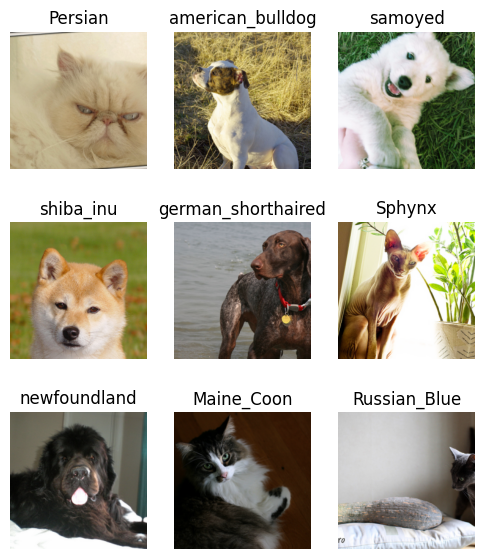

In [ ]:
dls.show_batch(max_n=9, figsize=(6,7))

In [ ]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [ ]:
dls.vocab.o2i

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/zach_mueller_huggingface_co/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.939954,0.353235,0.109608,00:36
1,0.673132,0.257873,0.082544,00:36
2,0.374954,0.231789,0.076455,00:36
3,0.279564,0.224494,0.069689,00:36


In [ ]:
learn.save('stage_1')

Path('models/stage_1.pth')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

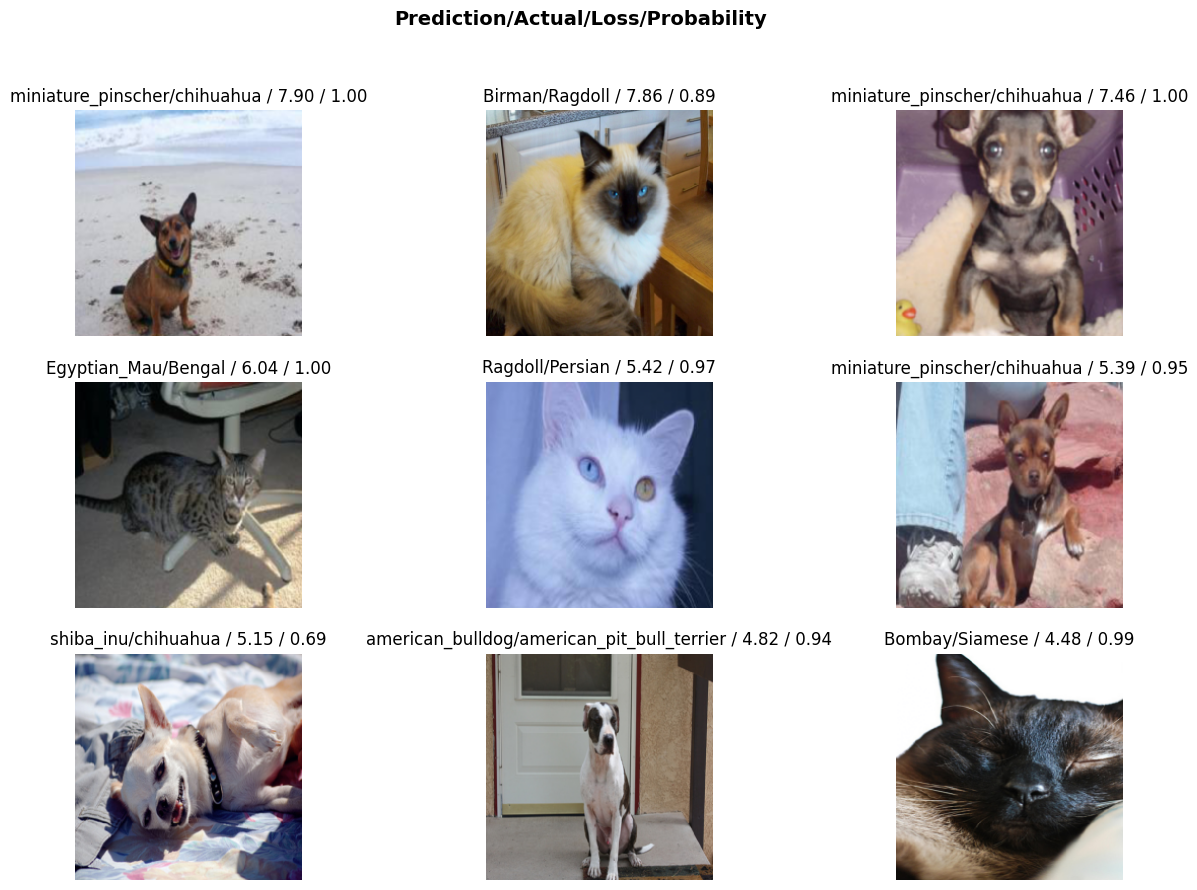

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

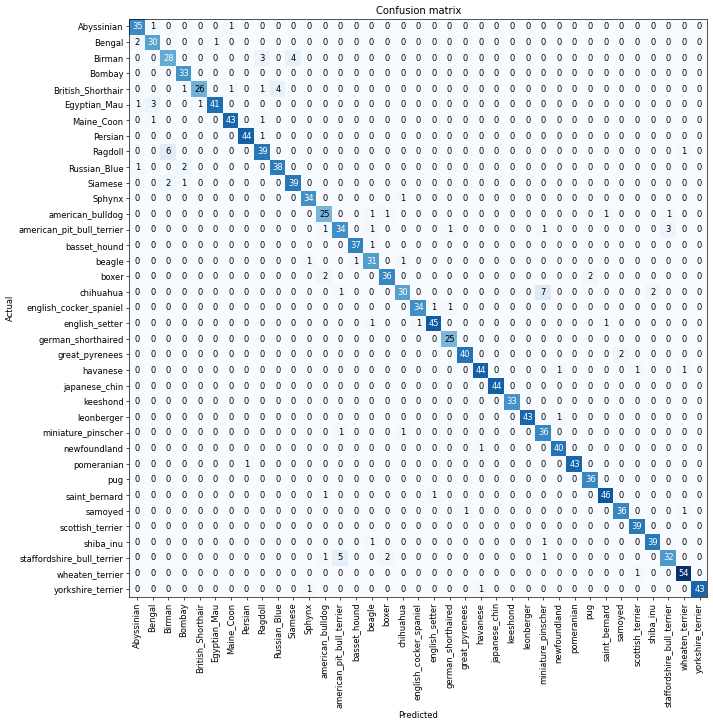

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=3)

[('chihuahua', 'miniature_pinscher', 7),
 ('Ragdoll', 'Birman', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Birman', 'Siamese', 4),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Birman', 'Ragdoll', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3)]

In [ ]:
learn.load('stage_1');

In [ ]:
learn.unfreeze()

SuggestedLRs(valley=5.248074739938602e-05)

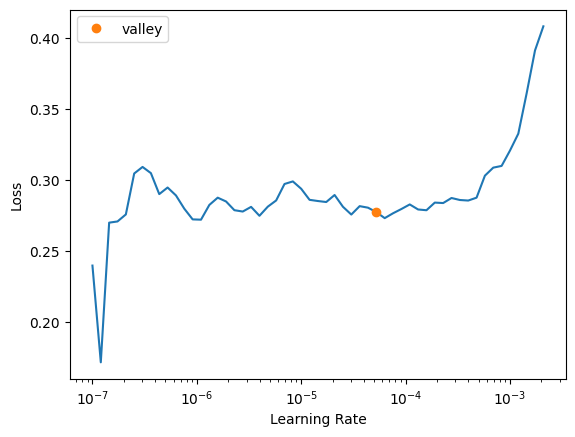

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.257934,0.215489,0.071042,00:41
1,0.249958,0.203696,0.064276,00:40
2,0.211961,0.207521,0.067659,00:40
3,0.187639,0.202181,0.066982,00:40


In [ ]:
learn.save('stage_2')

Path('models/stage_2.pth')